_Lizenz: Das folgende Lehrmaterial kann unter einer [CC-BY-SA 4.0](https://creativecommons.org/licenses/by/4.0/legalcode) Lizenz frei verwendet, verbreitet und modifiziert werden._   
 _Authoren: Jana Lasser (jana.lasser@ds.mpg.de)_  
 _Das Lehrmaterial wurde im Zuge des Projektes "Daten Lesen Lernen", gefördert vom Stifterverband und der Heinz Nixdorf Stiftung erstellt._

# Lösung zu Übung 08 - Wirtschaftswissenschaften: Bruttoinlandsprodukt und Inferenz
### Praktische Hinweise
$\rightarrow$ Übungen sind dafür gedacht, dass ihr sie euch daheim anseht und versucht, ein paar Aufgaben selbst zu lösen. In den Tutorien könnt ihr euch weiter mit dem Lösungen der Aufgaben beschäftigen und dabei Hilfe von den Tutor*innen bekommen.  

$\rightarrow$ Wenn ein Fehler auftritt:
1. Fehlermeldung _lesen_ und _verstehen_
2. Versuchen, selbst eine Lösung zu finden ($\rightarrow$ hier findet das Lernen statt!)
3. Das Problem googlen (Stichwort: Stackoverflow) oder den/die Nachbar*in fragen
4. Tutor*in fragen

$\rightarrow$ Unter <font color='green'>**HINWEIS**</font> werden Hinweise gegeben, die für die Lösung der Aufgabe hilfreich sind und oftmals auch weiterführende Informationen zur Aufgabe liefern.

$\rightarrow$ Mit **(Optional)** gekennzeichnete Übungsteile sind für besonders schnelle Menschen :-).

<a name="top"></a>Inhalt
--- 

* [Datenquellen aggregieren](#datenquellen)
* [Pro-Kopf Streiktage](#pro_kopf_streiktage)
* [(optional) Sinkt das BIP durch Streiks?](#inferenz)

<a name="datenquellen"></a>1. Datenquellen aggregieren
---
Im ersten Schritt laden wir alle benötigten Daten in das Notebook. Wir benutzten für die folgende Analyse das "broad" Format der Tabellen, da dieses für unsere Zwecke einfacher zu handhaben ist. Die Tabelle mit den Streiktagen haben wir schon gespeichert und können sie einfach laden:

In [1]:
# importieren der benötigten Module
from os.path import join
import pandas as pd

# laden der Streiktage-Daten 
fname_tage = 'NumberofDaysLostinLabourDisputes_Broad.xlsx'
tage = pd.read_excel(join("daten/", fname_tage))
tage.head(3)

,ccode,country name,1500,1501,1502,1503,1504,1505,1506,1507,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,4.0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12.0,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Die Tabelle mit dem Zeitverlauf des Bruttolinlandsproduktes musst du erst [hier](https://clio-infra.eu/data/GDPperCapita_Broad.xlsx) herunterladen, in den JupyterHub hochladen und dann mit pandas als DataFrame laden:

In [2]:
# laden der GDP-Daten
fname_GDP = 'GDPperCapita_Broad.xlsx'
GDP = pd.read_excel(join("daten/", fname_GDP))
GDP.head(3)

,ccode,country name,1500,1501,1502,1503,1504,1505,1506,1507,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,4.0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,790.0000,863.0000,869.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4367.4382,4647.3138,5010.0318,5178.8669,5374.9908,NaN,NaN,NaN,NaN,NaN
2,12.0,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3385.7719,3427.7116,3447.4191,3466.5426,3512.5807,NaN,NaN,NaN,NaN,NaN


Die Tabelle ```Data_Extract_From_World_Development_Indicators.xlsx'``` mit den Daten zur Landesbevölkerung kannst du aus dem StudIP herunterladen. Die Daten stammen aus [dieser](https://databank.worldbank.org/data/reports.aspx?source=2&series=SP.POP.TOTL&country=) Quelle.

In [3]:
# laden der Populationsdaten 
fname_pop = 'Data_Extract_From_World_Development_Indicators.xlsx'
pop = pd.read_excel(join("daten/", fname_pop))
pop.head(3)

,Unnamed: 0,country name,1960_pop,1961_pop,1962_pop,1963_pop,1964_pop,1965_pop,1966_pop,1967_pop,...,2006_pop,2007_pop,2008_pop,2009_pop,2010_pop,2011_pop,2012_pop,2013_pop,2014_pop,2015_pop
0,0,Afghanistan,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,...,25893450.0,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0
1,1,Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0
2,2,Algeria,11124888.0,11404859.0,11690153.0,11985136.0,12295970.0,12626952.0,12980267.0,13354197.0,...,33777915.0,34300076.0,34860715.0,35465760.0,36117637.0,36819558.0,37565847.0,38338562.0,39113313.0,39871528.0


Unser Ziel ist es, die drei Tabellen zu einer einzigen Tabelle zusammenzuführen. Da die Populationsdaten nur ab 1960 vorliegen, können wir die Einträge vor 1960 in den anderen beiden Datensätzen getrost entfernen:

In [4]:
obsolete_spalten= ['{}'.format(i) for i in range(1500, 1960)]
GDP.drop(columns = obsolete_spalten, inplace=True)
tage.drop(columns = obsolete_spalten, inplace=True)

**A.** Entferne auch die Spalten ```ccode``` aus den beiden DataFrames. Entferne mit der Funktion ```drop_duplicates()``` alle Duplikate ([Dokumentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)) aus allen drei DataFrames.

In [5]:
tage.drop(columns=['ccode'], inplace=True)
GDP.drop(columns=['ccode'], inplace=True)

In [6]:
tage.drop_duplicates(subset = 'country name', inplace = True)
GDP.drop_duplicates(subset = 'country name', inplace = True)
pop.drop_duplicates(subset = 'country name', inplace = True)

Nun wollen wir noch die Spalten so umbenennen, dass selbst nachdem wir die DataFrames zusammengeführt haben klar ist, was die Zahlen bedeuten. Dafür hängen wir an die Jahreszahlen den Suffix ```_GDP``` an.

In [7]:
GDP.rename(columns={'{}'.format(i):'{}_GDP'.format(i) for i in range(1960, 2016)}, inplace=True)
GDP.head(3)

,country name,1960_GDP,1961_GDP,1962_GDP,1963_GDP,1964_GDP,1965_GDP,1966_GDP,1967_GDP,1968_GDP,...,2006_GDP,2007_GDP,2008_GDP,2009_GDP,2010_GDP,2011_GDP,2012_GDP,2013_GDP,2014_GDP,2015_GDP
0,Afghanistan,739.0,730.0,726.0,723.0,720.0,720.0,710.0,712.0,719.0,...,790.0000,863.0000,869.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,1451.0,1463.0,1511.0,1563.0,1616.0,1675.0,1738.0,1804.0,1869.0,...,4367.4382,4647.3138,5010.0318,5178.8669,5374.9908,NaN,NaN,NaN,NaN,NaN
2,Algeria,2088.0,1799.0,1433.0,1768.0,1806.0,1870.0,1725.0,1824.0,1977.0,...,3385.7719,3427.7116,3447.4191,3466.5426,3512.5807,NaN,NaN,NaN,NaN,NaN


**B.** Benenne auch die Spalten im ```tage```-DataFrame entsprechend um, indem du den suffix ```_days``` an die Spaltennamen hängst.

In [8]:
tage.rename(columns={'{}'.format(i):'{}_days'.format(i) for i in range(1960, 2016)}, inplace=True)
print('Anzahl Zeilen (Länder): {}'.format(len(tage)))
tage.head(3)

Anzahl Zeilen (Länder): 195


,country name,1960_days,1961_days,1962_days,1963_days,1964_days,1965_days,1966_days,1967_days,1968_days,...,2006_days,2007_days,2008_days,2009_days,2010_days,2011_days,2012_days,2013_days,2014_days,2015_days
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Zwei DataFrames lassen sich mit Hilfe der Funktion ```DataFrame.merge()``` zusammenführen (siehe [Dokumentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)). Dabei bezeichnet das Argument ```on``` die Spalte, anhand derer die DataFrames zusammengeführt werden. Bei uns wird das die Spalte ```country name``` sein, da diese als einzige in allen drei DataFrames gleich ist. Das Argument ```how``` gibt an, wie die DataFrames zusammengeführt werden. Währen wir ```how=inner``` dann wird die Schnittmenge der Einträge in der Spalte, anhand derer wir die DataFrames zusammenführen, genommen. Das heißt, Zeilen, die nur in einem DataFrame vorhanden sind aber nicht in dem zweiten, fallen weg.

In [9]:
# zusammenfügen der DataFrames mit den Daten zu den Streiktagen und der Bevölkerung
data = tage.merge(pop, on = 'country name', how = 'inner')
# wir sehen, dass 24 Länder weggefallen sind, da sie nur im "tage", nicht
# aber im "pop"-DataFrame vorhanden waren
print('Anzahl Zeilen (Länder): {}'.format(len(data)))
data.head(3)

Anzahl Zeilen (Länder): 171


,country name,1960_days,1961_days,1962_days,1963_days,1964_days,1965_days,1966_days,1967_days,1968_days,...,2006_pop,2007_pop,2008_pop,2009_pop,2010_pop,2011_pop,2012_pop,2013_pop,2014_pop,2015_pop
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25893450.0,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33777915.0,34300076.0,34860715.0,35465760.0,36117637.0,36819558.0,37565847.0,38338562.0,39113313.0,39871528.0


**C.** Füge das neu geschaffene DataFrame ```data``` mit dem verbleibenden DataFrame ```GDP``` zusammen.

In [10]:
data = data.merge(GDP, on = 'country name', how = 'inner')
data.head(3)

,country name,1960_days,1961_days,1962_days,1963_days,1964_days,1965_days,1966_days,1967_days,1968_days,...,2006_GDP,2007_GDP,2008_GDP,2009_GDP,2010_GDP,2011_GDP,2012_GDP,2013_GDP,2014_GDP,2015_GDP
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,790.0000,863.0000,869.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4367.4382,4647.3138,5010.0318,5178.8669,5374.9908,NaN,NaN,NaN,NaN,NaN
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3385.7719,3427.7116,3447.4191,3466.5426,3512.5807,NaN,NaN,NaN,NaN,NaN


[Anfang](#top)

<a name="pro_kopf_streiktage"></a>2. Pro-Kopf Streiktage
---
Aktuell liegt die Anzahl der Streiktage für ein Jahr in einem Land als absoluter Wert vor. Natürlich haben größere Ländern tendentiell mehr Streiktage als kleinere.

**A. (optional)** Überprüfe diese Aussage, indem du analysierst, ob die mittlere Anzahl der Streiktage zwischen 1980 und 2000 tatsälich mit der mittleren Bevölkerungsanzahl in diesen Jahren korreliert. Benutze dafür die in Teil **3** vorgestellte lineare Regression.

Verbleibende Länder im Zeitraum 1980 bis 2000: 96


/anaconda/envs/networks/lib/python3.6/site-packages/IPython/core/pylabtools.py:121: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


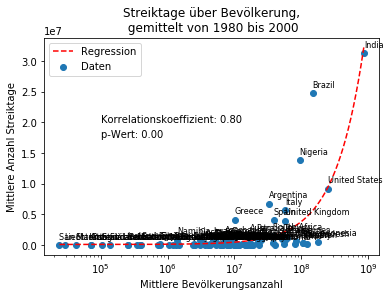

In [11]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
%matplotlib inline

# start-Jahr ab dem gemittelt wird
start = 1980
# Zeitraum (in Jahren) über den gemittelt wird
window = 20

# mittlere Streikanzahl im Zeitraum
strike_columns = ['{}_days'.format(i) for i in range(start, start + window)]
average_strikes = data[strike_columns].mean(axis=1)

# mittlere Bevölkerungszahl im Zeitraum
pop_columns = ['{}_pop'.format(i) for i in range(start, start + window)]
average_pop = data[pop_columns].mean(axis=1)

# temporäres DataFrame zum speichern der Werte
temp_df = pd.DataFrame({'country name':data['country name'],\
                        'strikes':average_strikes,\
                        'population':average_pop})

# entferne alle Einträge, die fehlende Werte aufweisen
temp_df.dropna(inplace=True)
print('Verbleibende Länder im Zeitraum {} bis {}: {}'\
      .format(start, start + window, len(temp_df)))

# lineare Regression der Streiktage über der Bevölkerungszahl
slope, intercept, rvalue, pvalue, stderr = \
    scipy.stats.linregress(temp_df['population'], temp_df['strikes'].astype(float))

# Scatterplot der mittleren Streiktage über der mittleren
# Bevölkerungsanzahl
plt.scatter(temp_df['population'], temp_df['strikes'], label='Daten')
x = np.arange(temp_df['population'].min(), temp_df['population'].max(), 1e3)
y = intercept + slope * x
plt.plot(x, y, '--', color='red', label='Regression')

# Beschriftung der Datenpunkte mit Ländernamen
for name, y, x in zip(temp_df['country name'], temp_df['strikes'], temp_df['population']):
    plt.text(x, y + 1e6, name, fontsize=8)
    
# Beschriftung mit Werten aus der linearen Regression
plt.text(1e5, 2*1e7, 'Korrelationskoeffizient: {:1.2f}'.format(rvalue))
plt.text(1e5, 1.75*1e7, 'p-Wert: {:1.2f}'.format(pvalue))
    
# Beschriftung des Plots
plt.ylabel('Mittlere Anzahl Streiktage')
plt.xlabel('Mittlere Bevölkerungsanzahl')
plt.title('Streiktage über Bevölkerung,\n gemittelt von {} bis {}'\
          .format(start, start + window))
plt.legend()

# logarithmische x-achse, damit überhaupt irgendetwas zu erkennen ist
plt.xscale('log')

**B.** Teile für jedes Jahr die Anzahl der Streiktage durch die Bevölkerungszahl und füge die resultierende genormte Anzahl an Streiktagen dem DataFrame als neue Spalten hinzu.

In [12]:
# normalisierte Streiktage
for i in range(1960, 2016):
    data['{}_norm'.format(i)] = data['{}_days'.format(i)] / data['{}_pop'.format(i)]
    
data.head(3)

,country name,1960_days,1961_days,1962_days,1963_days,1964_days,1965_days,1966_days,1967_days,1968_days,...,2006_norm,2007_norm,2008_norm,2009_norm,2010_norm,2011_norm,2012_norm,2013_norm,2014_norm,2015_norm
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Wie gewohnt, können wir das DataFrame nach einzelnen Ländern filtern. Die der Verlauf der absoluten Anzahl der Streiktage lässt sich dann einfach als Zeitreihe visualisieren:

In [13]:
country = 'United Kingdom'
filter_country = data['country name'] == country
data_country = data[filter_country]
data_country.head()

,country name,1960_days,1961_days,1962_days,1963_days,1964_days,1965_days,1966_days,1967_days,1968_days,...,2006_norm,2007_norm,2008_norm,2009_norm,2010_norm,2011_norm,2012_norm,2013_norm,2014_norm,2015_norm
163,United Kingdom,3024000.0,3046000.0,5798000.0,1755000.0,2277000.0,2925000.0,2398000.0,2787000.0,4690000.0,...,0.0124,0.016977,0.012278,0.007309,0.00582,0.021973,0.003909,0.006917,NaN,NaN


Text(0.5, 1.0, 'United Kingdom')

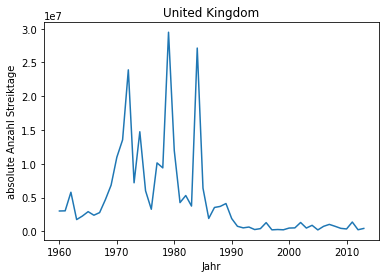

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

years = list(range(1960, 2015))
y = data_country[['{}_days'.format(i) for i in years]].values[0]
plt.plot(years, y)
plt.xlabel('Jahr')
plt.ylabel('absolute Anzahl Streiktage')
plt.title('{}'.format(country))

**C.** Nachdem wir die Streiktage normalisiert haben, sind auch Länder mit drastisch unterschiedlicher Bevölkerungszahl verlgeichbar. Stelle für drei Länder deiner Wahl, deren Bevölkerungszahl sich stark unterscheidet, den Zeitverlauf der mit der Bevölkerungszahl normalisierten Streiktage dar. 

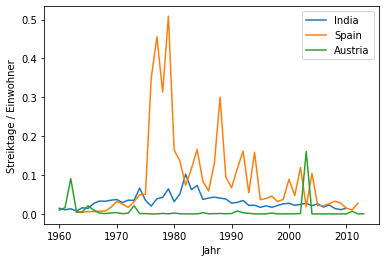

In [15]:
# drei Länder
countries = ['India', 'Spain', 'Austria']
# filter
country_filters = [data['country name'] == c for c in countries]
# nach Ländern gefilterte DataFrames
country_data = [data[f] for f in country_filters]

# Zeitraum
years = list(range(1960, 2015))

# Liniendiagramme der Zeitreihen für die drei Länder
for c, d in zip(countries, country_data):
    y = d[['{}_norm'.format(i) for i in years]].values[0]
    plt.plot(years, y, label = c)

# Beschriftungen
plt.xlabel('Jahr')
plt.ylabel('Streiktage / Einwohner')
plt.legend()

**D. (optional)** Aktuell normalisieren wir die Anzahl der Streiktage in einem Jahr mit der Bevölkerungszahl im selben Jahr. Untersuche anhand des Beispiels von einem Land, wie groß der Unterschied zwischen dieser Vorgehensweise und einer Normalisierung aller Jahre mit der Bevölkerungszahl im Jahr 1960 bzw. 2015 is.

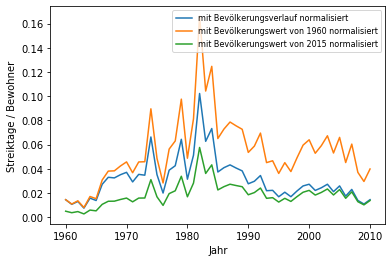

In [16]:
# wähle ein Land aus
country = 'India'
country_filter = data['country name'] == country
country_data = data[country_filter]

# Zeitraum
years = list(range(1960, 2015))

# Zeitverlauf der Bevölkerungszahl
country_pop = country_data[['{}_pop'.format(i) for i in years]].values[0]
# Zeitverlauf der (nicht normalisierten) Streiktage
country_days = country_data[['{}_days'.format(i) for i in years]].values[0]

# mit dem Verlauf der Bevölkerungsanzahl normalisierter Verlauf der Streiktage
y1 = country_data[['{}_norm'.format(i) for i in years]].values[0]
# mit der Bevölkerungszahl aus 1960 normalisierter Verlauf der Streiktage
y2 = country_days / country_pop[0]
# mit der Bevölkerungszahl aus 2015 normalisierter Verlauf der Streiktage
y3 = country_days / country_pop[-1]

# plotte drei Liniendiagramme für die drei Zeitreihen
plt.plot(years, y1, label='mit Bevölkerungsverlauf normalisiert')
plt.plot(years, y2, label='mit Bevölkerungswert von 1960 normalisiert')
plt.plot(years, y3, label='mit Bevölkerungswert von 2015 normalisiert')

# Beschriftungen
plt.xlabel('Jahr')
plt.ylabel('Streiktage / Bewohner')
plt.legend(fontsize=8)

**E.** Stelle für die selben drei Länder wie in Aufgabe **2.C** den Verlauf der Bevölkerungszahl über die Zeit dar. <font color='green'>**HINWEIS:**  mit ```plt.yscale('log')``` stellst du die y-Achse auf logarithmische Darstellung um.</font> 

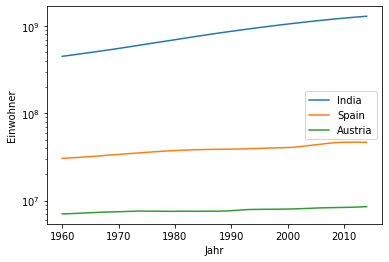

In [17]:
# drei Länder
countries = ['India', 'Spain', 'Austria']
# filter
country_filters = [data['country name'] == c for c in countries]
# nach Ländern gefilterte DataFrames
country_data = [data[f] for f in country_filters]

# Liniendiagramme der Zeitreihen für die drei Länder
for c, d in zip(countries, country_data):
    y = d[['{}_pop'.format(i) for i in years]].values[0]
    plt.plot(years, y, label = c)

# y-Achse auf logarithmische Darstellung umstellen
plt.yscale('log')
    
# Beschriftungen
plt.xlabel('Jahr')
plt.ylabel('Einwohner')
plt.legend()

[Anfang](#top)

<a name="inferenz"></a>3. (optional) Sinkt das BIP durch Streiks?
---
Schlussendlich wollen wir uns ansehen, ob wir einen statistisch signifikanten Zusammenhang zwischen BIP und (normalisierter) Anzahl der Streiktage in einem Land feststellen können. Um solche Zusammenhänge zwischen Beobachtungen darzustellen, eignet sich der Scatterplot. Die Funktion ```plt.scatter(x,y)``` ([Dokumentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html)) erlaubt es uns, einen einfachen Scatterplot zu erstellen:

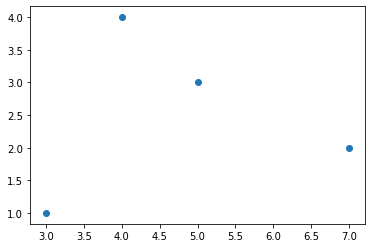

In [18]:
x = [3,5,7,4]
y = [1,3,2,4]

plt.scatter(x,y)

**A. (optional)** Berechne die mittlere Anzahl an Streiktagen pro Person zwischen 1960 und 1970. Speichere berechneten genormten Streiktage zusammen mit dem BIP und dem Ländernamen in einem neuen DataFrame. Entferne mit der Funktion ```df.dropna()``` alle fehlenden Einträge aus dem DataFrame.

In [19]:
# start-Jahr ab dem gemittelt wird
start = 1960
# Zeitraum (in Jahren) über den gemittelt wird
window = 10

# mittlere Streiktage / Bewohner im Zeitraum
strike_columns = ['{}_norm'.format(i) for i in range(start, start + window)]
average_strikes = data[strike_columns].mean(axis=1)

# temporäres DataFrame zum speichern der Werte
temp_df = pd.DataFrame({'country name':data['country name'],\
                        'strikes':average_strikes,\
                        '{}_GDP'.format(start + window):data['{}_GDP'.format(start + window)]})

# entferne alle Einträge, die fehlende Werte aufweisen
temp_df.dropna(inplace=True)
print('Verbleibende Länder im Zeitraum {} bis {}: {}'\
      .format(start, start + window, len(temp_df)))

Verbleibende Länder im Zeitraum 1960 bis 1970: 64


**B. (optional)** Stelle das BIP im Jahr 1990 über der mittleren Anzahl an Streiktagen in diesem Zeitraum dar. Benutze dafür das neu erstellte DataFrame.

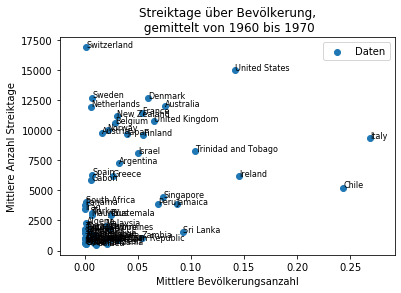

In [20]:
# Scatterplot der mittleren Streiktage über der mittleren
# Bevölkerungsanzahl
plt.s
plt.scatter(temp_df['strikes'], temp_df['{}_GDP'.format(start + window)], label='Daten')

# Beschriftung der Datenpunkte mit Ländernamen
for name, x, y in zip(temp_df['country name'], temp_df['strikes'],\
                      temp_df['{}_GDP'.format(start + window)]):
    plt.text(x, y, name, fontsize=8)
    
# Beschriftung des Plots
plt.ylabel('Mittlere Anzahl Streiktage')
plt.xlabel('Mittlere Bevölkerungsanzahl')
plt.title('Streiktage über Bevölkerung,\n gemittelt von {} bis {}'\
          .format(start, start + window))
plt.legend()

**C. (optional)** Mache dich mit der Funktion ```linregress()``` der Bibliothek SciPy vertraut ([Dokumentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)). Was für Eingabewerte verlangt die Funktion? Was für Werte gibt sie aus?

**Eingabewerte:**
* _die unabhängige Variable ```x``` (in unserem Fall die Tweet-Länge in Zeichen)_
* _die abhängige Variable ```y``` (in unserem Fall die Anzahl der Worte je Tweet)_

**Ausgabewerte:**
Die Ausgabewerte der Funktion beschreiben eine Gerade, sowie Maße für die Unsicherheit der Regression
* _```slope``` ist die Steigung der Geraden._
* _```intercept``` ist der Achsenabschnitt der Geraden._
* _der ```rvalue``` ist der "Korrelationskoeffizient" und gibt an, wie stark die abhängige Größe mit der unabhängigen korreliert. Ist ```rvalue=1```, dann steigt die abhängige Größe immer dann, wenn die unabhängige auch steigt. Ist ```rvalue=0```, dann sind die beiden Größen unabhängig voneinander. Ist ```rvalue=-1```, dann sinkt die abhängige größe, wenn die unabhängige Größe steigt (anti-korreliert)._
* _der ```pvalue``` ([p-Wert](https://de.wikipedia.org/wiki/P-Wert)) gibt an wie wahrscheinlich es ist eine Testgröße zu erhalten die noch unwahrscheinlicher ist als die beobachtete, unter der Annahme, dass die Nullhypothese (keine Korrelation) wahr ist.._
* _der ```stderr``` ist der [Standardfehler](https://de.wikipedia.org/wiki/Standardfehler) der Steigung._

**D. (optional)** führe eine lineare Regression des BIP über den mittleren Streiktagen pro Person im vorangegangenen Jahrzehnt durch. Gib die resultierenden Werte aus. Was bedeuten sie? 

In [21]:
# importieren des Untermoduls "stats" von SciPy
from scipy import stats

# Lineare Regression des BIP über den Streiktagen.
# Die resultierenden fünf Werte werden direkt fünf Variablen zugeordnet
slope, intercept, rvalue, pvalue, stderr = \
    scipy.stats.linregress(temp_df['strikes'], temp_df['{}_GDP'.format(start + window)])

# Ausgabe der Ergebnisse
print('Resultierende Gerade: y(x) = {:1.2f} + ({:1.2f} +- {:1.2f}) * x'.format(intercept, slope, stderr))
print('Korrelationskoeffizient: {:1.2f}, p-Wert: {:1.3f}'.format(rvalue, pvalue))

Resultierende Gerade: y(x) = 3624.75 + (30590.71 +- 9918.52) * x
Korrelationskoeffizient: 0.36, p-Wert: 0.003


* _Der Korrelationskoeffizient sagt uns, dass das BIP leicht **positiv** mit den Streiktagen pro Person korreliert. Länder mit höherem BIP haben also auch tendentiell mehr Streiktage._
* _Der p-Wert sagt uns, dass dieses Ergebnis signifikant ist, wenn wir $p=0.05$ als Signifikanzlevel annehmen. Ein p-Wert von 0.05 bedeutet, dass jeder zwanzigste Versuch, die Datenpunkte zufällig zu verteilen einen p-Wert kleiner als 0.05 produzieren wird. Bei einem niedrigeren p-Wert ist die Chance, das Ergebniss zufällig zu bekommen entsprechend geringer._
* _Das Ergebnis (positive Korrelation des BIP mit Streiktagen) ist nicht intuitiv. In erster Näherung würde ich davon ausgehen, dass Streiks das BIP negativ beeinflussen. Eventuell lässt sich die Korrelation damit erklären, dass Länder mit höheren BIP eine stärker organisierte Industrie (Gewerkschaften) aufweisen, und damit auch anfälliger für Streiks sind._

**E. (optional)** Stelle die aus der statistischen Regression resultierende Linie über dem Scatterplot aus Aufgabe **2.B** dar.

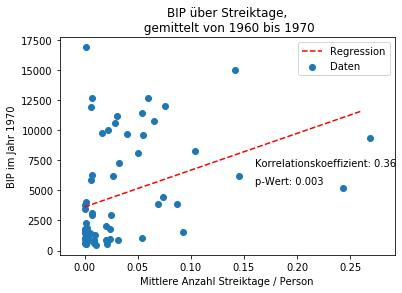

In [22]:
# Scatterplot der mittleren Streiktage über der mittleren
# Bevölkerungsanzahl
plt.scatter( temp_df['strikes'], temp_df['{}_GDP'.format(start + window)], label='Daten')
x = np.arange(temp_df['strikes'].min(), temp_df['strikes'].max(), 0.01)
y = intercept + slope * x
plt.plot(x, y, '--', color='red', label='Regression')
    
# Beschriftung mit Werten aus der linearen Regression
plt.text(0.16, 7*1e3, 'Korrelationskoeffizient: {:1.2f}'.format(rvalue))
plt.text(0.16, 5.5*1e3, 'p-Wert: {:1.3f}'.format(pvalue))
    
# Beschriftung des Plots
plt.ylabel('BIP im Jahr {}'.format(start + window))
plt.xlabel('Mittlere Anzahl Streiktage / Person')
plt.title('BIP über Streiktage,\n gemittelt von {} bis {}'\
          .format(start, start + window))
plt.legend()


[Anfang](#top)